In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
model = tf.keras.models.load_model("runs/text_classification/11/model")

In [3]:
data, info = tfds.load("imdb_reviews/subwords8k",
                           with_info=True,
                           as_supervised=True)

W0805 10:55:30.431408 4710557120 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [4]:
encoder = info.features["text"].encoder

In [5]:
inp = [encoder.encode(s) for s in [
    b"this movie is excellent", 
    b"this movie is good", 
    b"this movie sucks",
    b"That movie was absolutely awful",
    b"The acting was a bit lacking",
    b"The film was creative and surprising",
    b"Absolutely fantastic!"
]]

In [6]:
preds = [model.predict(tf.expand_dims(i, 0))[0] for i in inp]

In [7]:
preds

[array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[2.4073228e-07]], dtype=float32),
 array([[0.99999964]], dtype=float32),
 array([[1.]], dtype=float32)]

In [8]:
str_tokens = [encoder.decode([i]) for i in [19, 188, 18, 4, 287, 3453, 100]]

In [9]:
_, a1, a2 = model.predict(tf.expand_dims([19, 188, 18, 4, 287, 3453, 100], 0))

<Figure size 432x288 with 0 Axes>

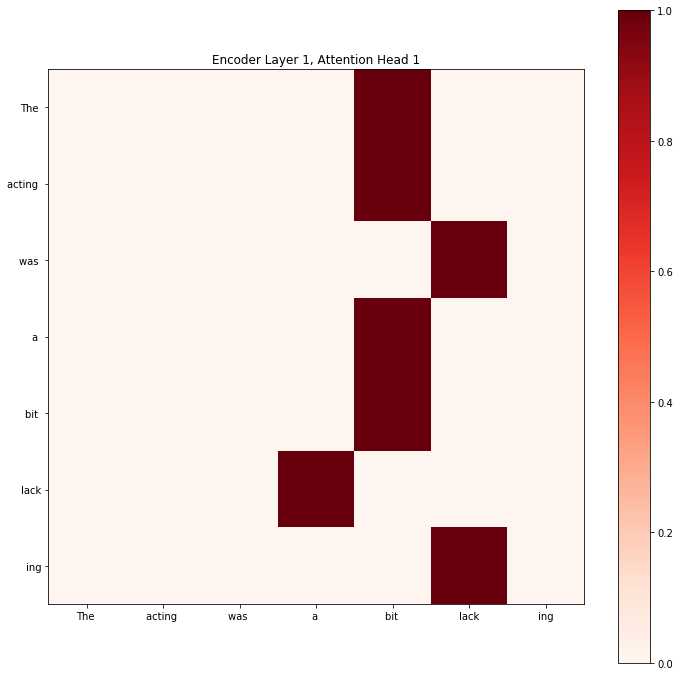

<Figure size 432x288 with 0 Axes>

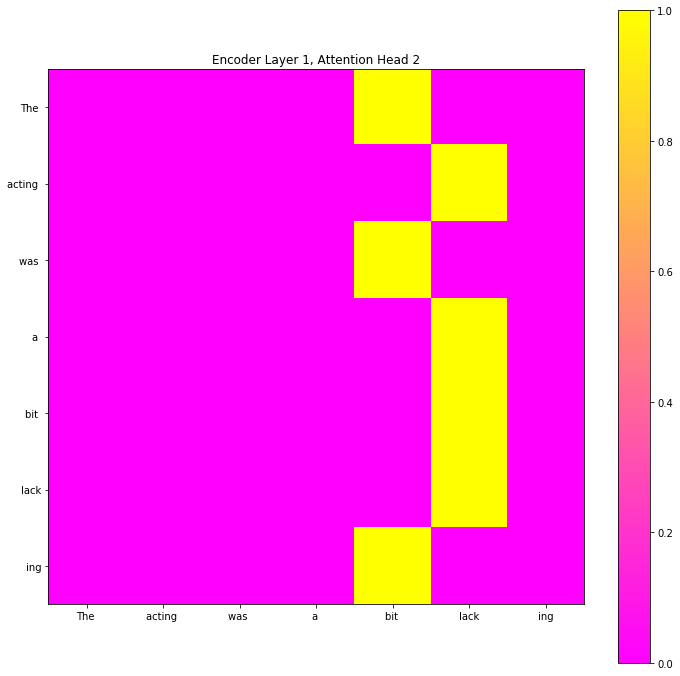

<Figure size 432x288 with 0 Axes>

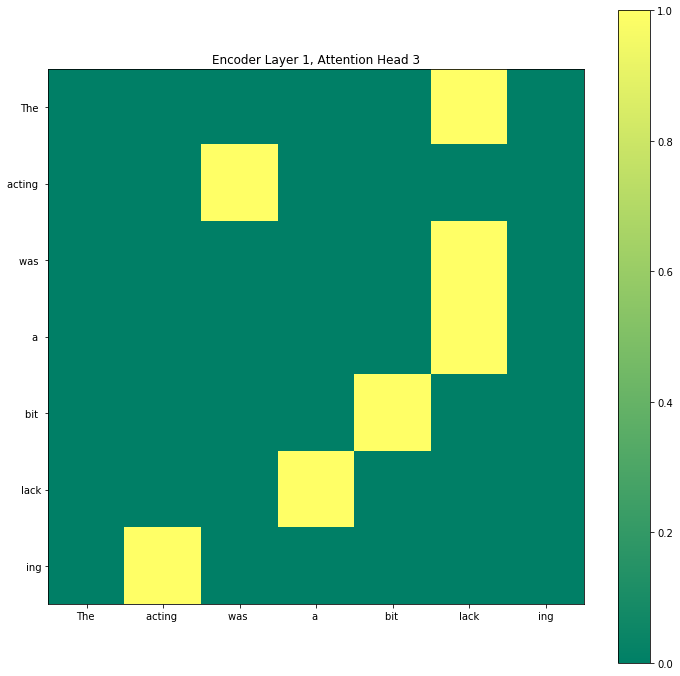

<Figure size 432x288 with 0 Axes>

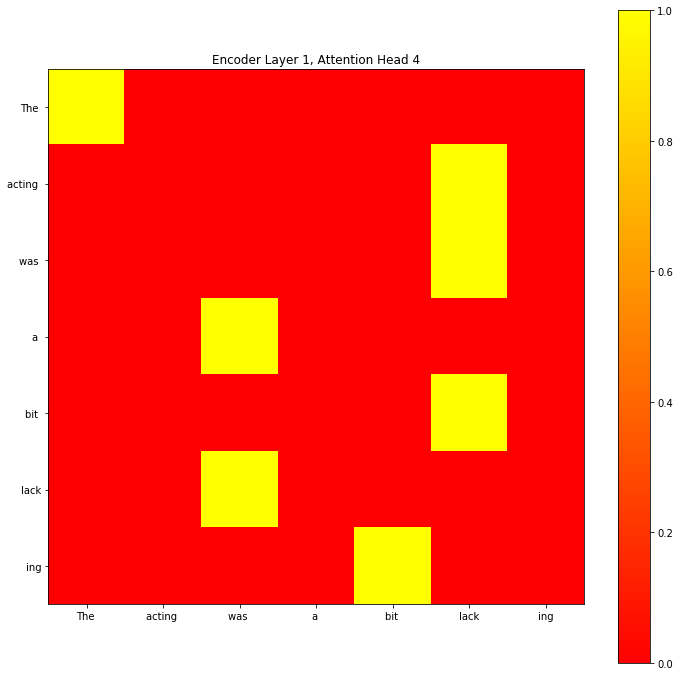

<Figure size 432x288 with 0 Axes>

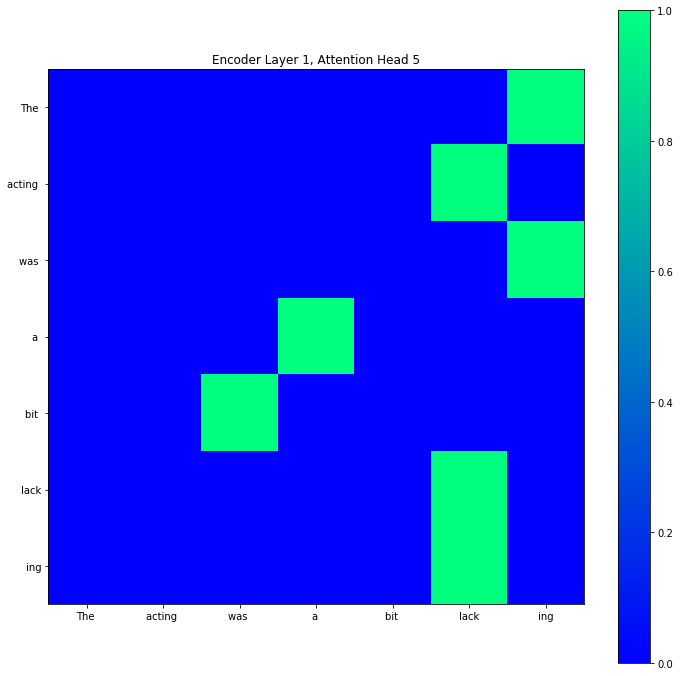

<Figure size 432x288 with 0 Axes>

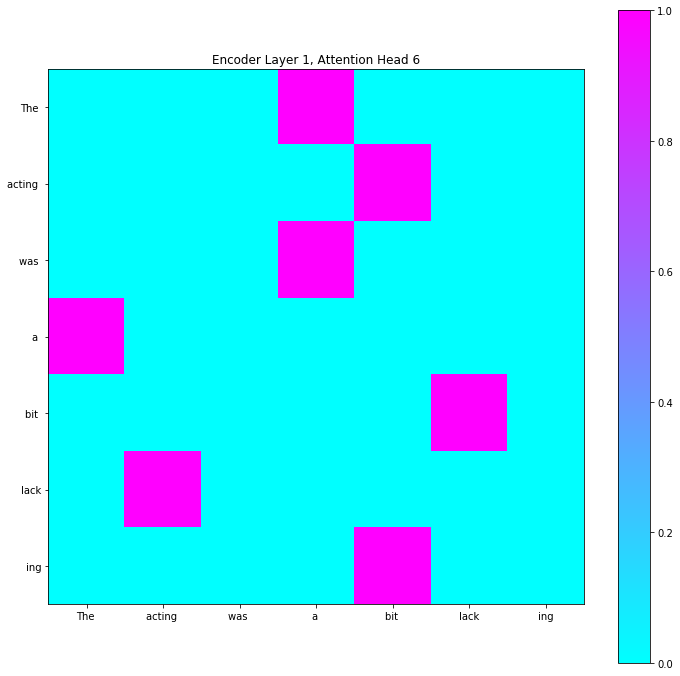

<Figure size 432x288 with 0 Axes>

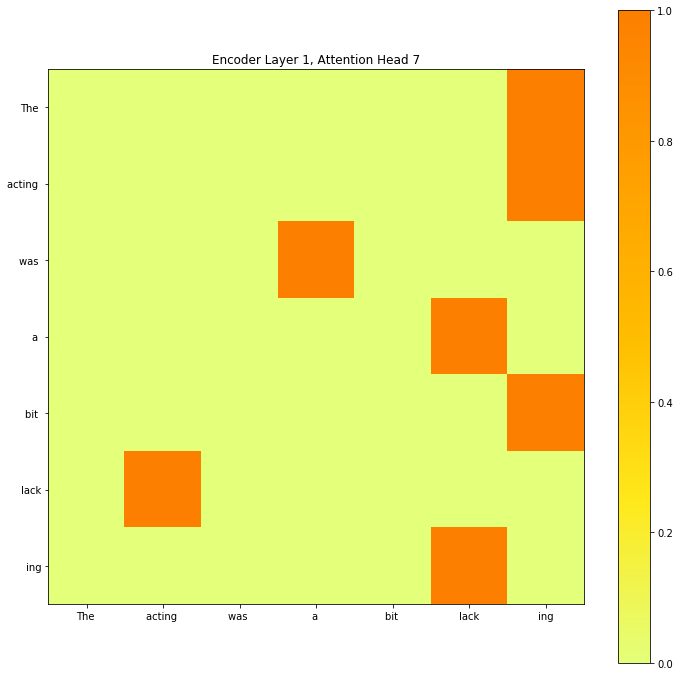

<Figure size 432x288 with 0 Axes>

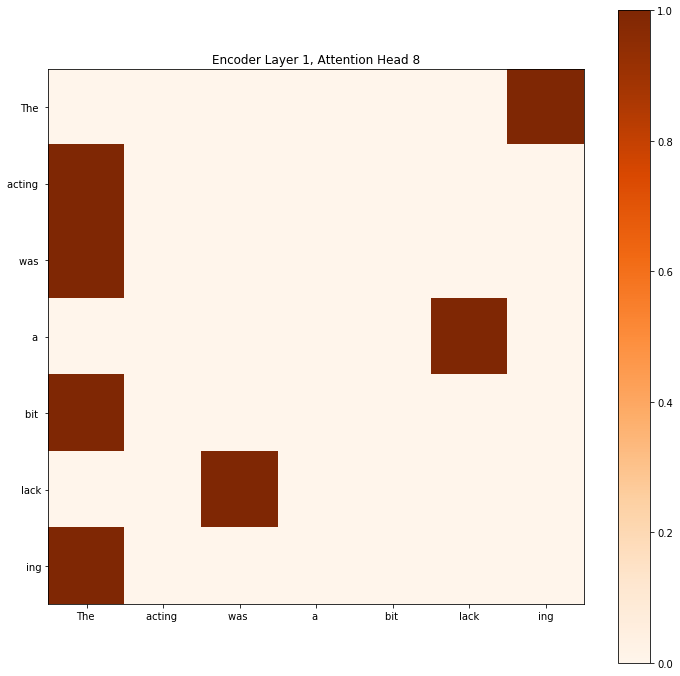

In [10]:
# https://matplotlib.org/users/colormaps.html
for i, cmap in enumerate(["Reds", "spring", "summer", "autumn", "winter", "cool", "Wistia", "Oranges"]):
    fig = plt.figure()
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    heatplot = ax.imshow(a1[0][i], cmap=cmap)
    ax.set_xticks(np.arange(len(str_tokens)))
    ax.set_yticks(np.arange(len(str_tokens)))
    ax.set_xticklabels(str_tokens)
    ax.set_yticklabels(str_tokens)
    plt.colorbar(heatplot)
    plt.title("Encoder Layer 1, Attention Head %d" % (i + 1))

<Figure size 432x288 with 0 Axes>

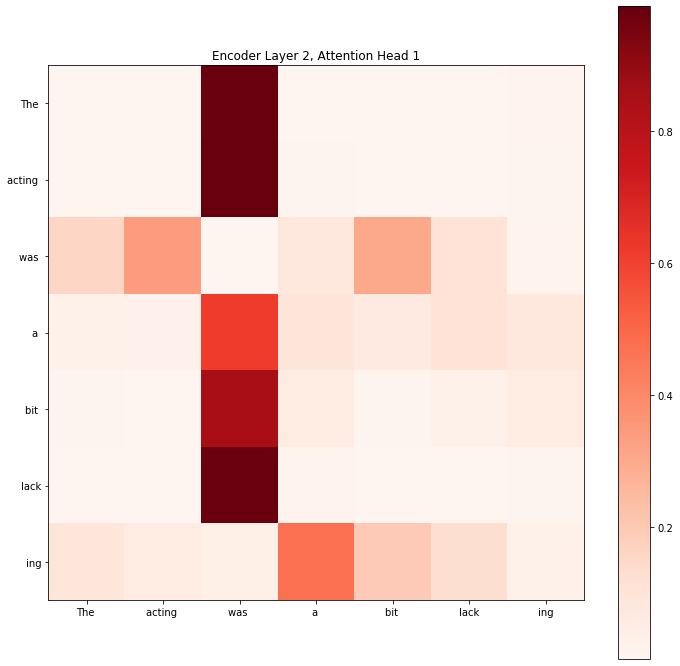

<Figure size 432x288 with 0 Axes>

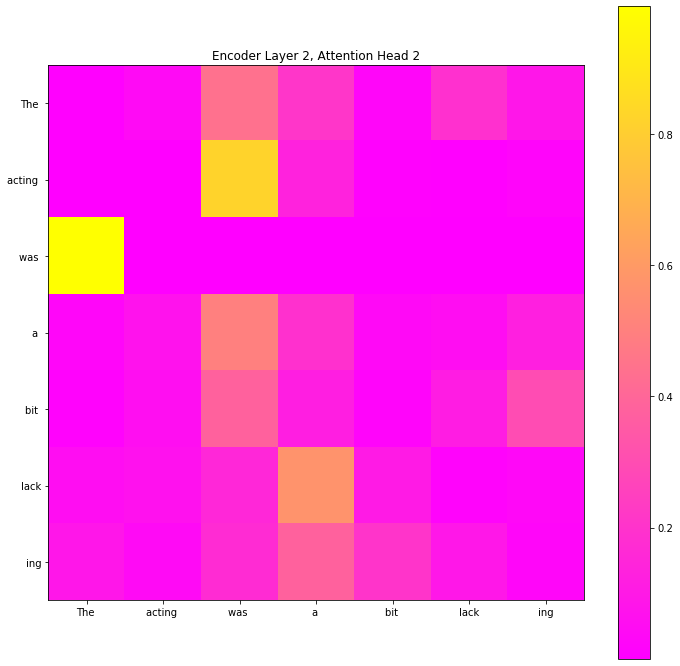

<Figure size 432x288 with 0 Axes>

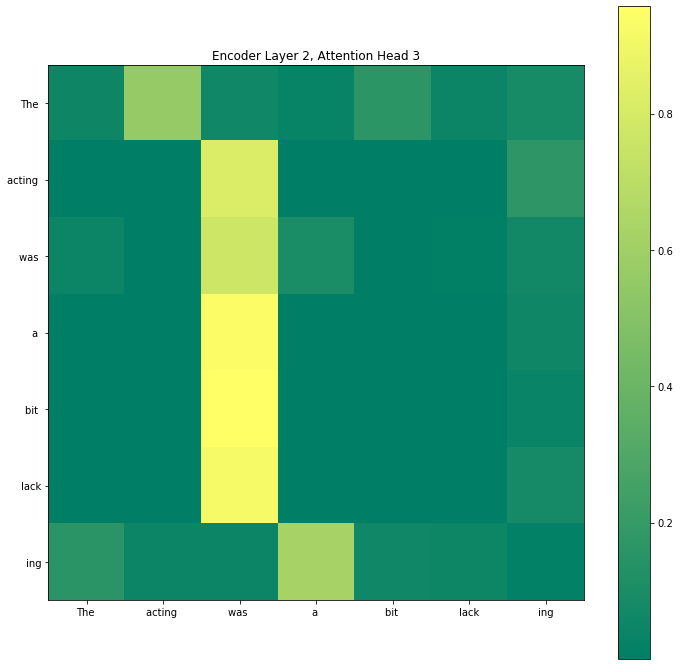

<Figure size 432x288 with 0 Axes>

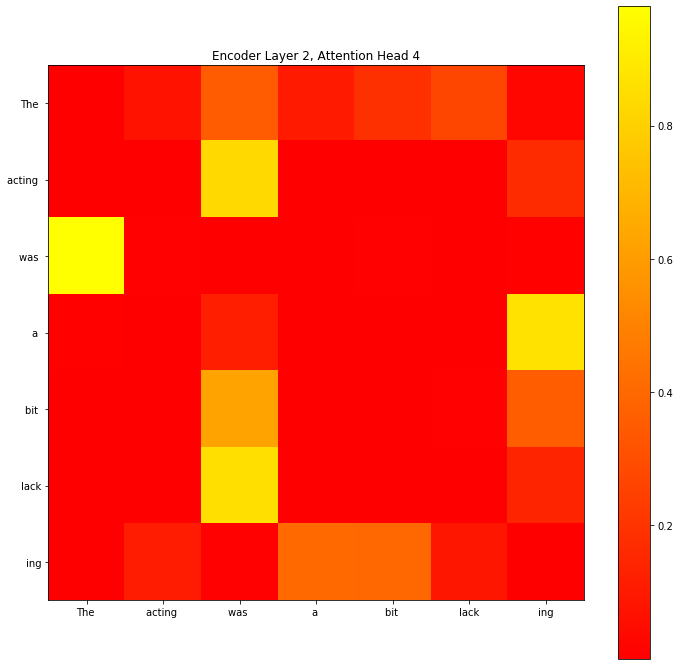

<Figure size 432x288 with 0 Axes>

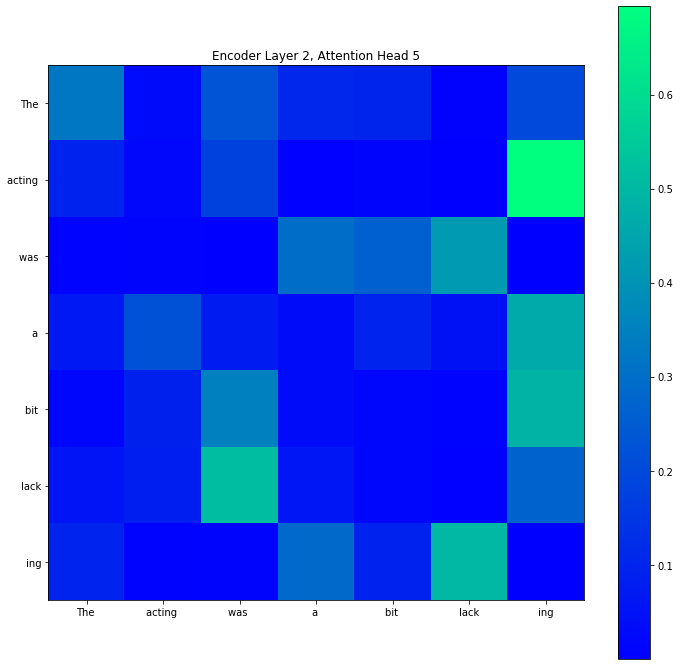

<Figure size 432x288 with 0 Axes>

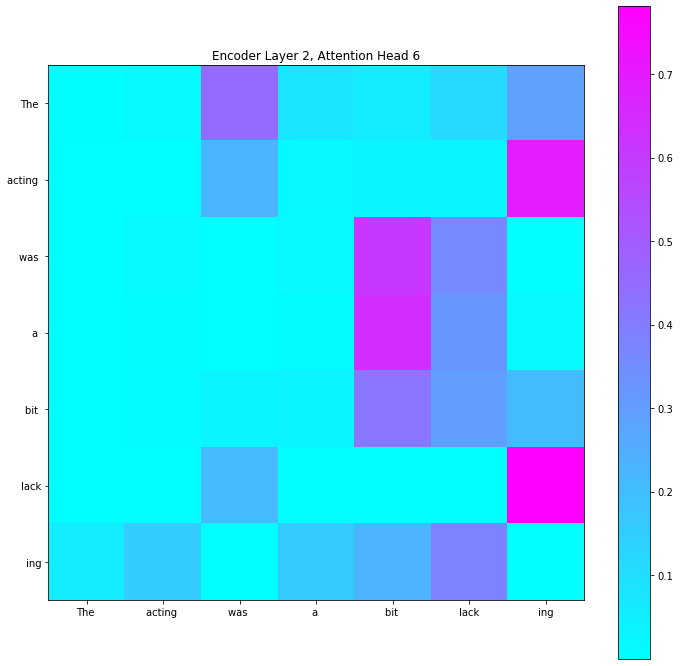

<Figure size 432x288 with 0 Axes>

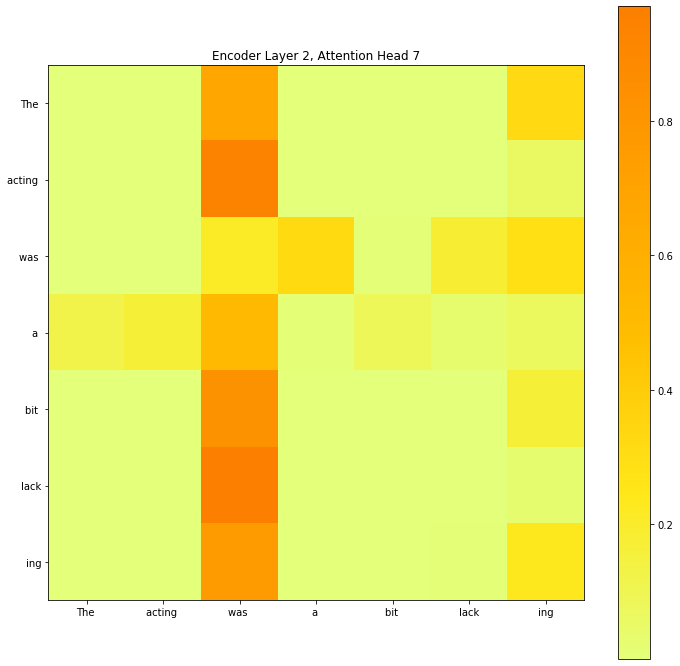

<Figure size 432x288 with 0 Axes>

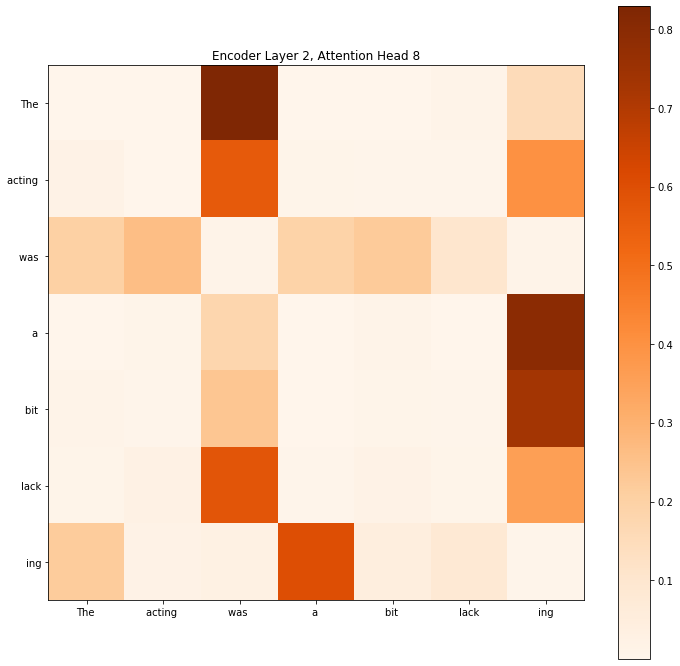

In [11]:
# https://matplotlib.org/users/colormaps.html
for i, cmap in enumerate(["Reds", "spring", "summer", "autumn", "winter", "cool", "Wistia", "Oranges"]):
    fig = plt.figure()
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    heatplot = ax.imshow(a2[0][i], cmap=cmap)
    ax.set_xticks(np.arange(len(str_tokens)))
    ax.set_yticks(np.arange(len(str_tokens)))
    ax.set_xticklabels(str_tokens)
    ax.set_yticklabels(str_tokens)
    plt.colorbar(heatplot)
    plt.title("Encoder Layer 2, Attention Head %d" % (i + 1))